# Imports/Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                             confusion_matrix, classification_report, mean_squared_error, 
                             log_loss, roc_curve, auc)
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.model_selection._split")
from imblearn.over_sampling import SMOTE
from itertools import combinations
from scipy import stats
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats._stats_py")
warnings.filterwarnings("ignore", category=RuntimeWarning, module="scipy.stats._axis_nan_policy")
import numpy as np
from scipy.stats import t, ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import f_oneway
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
import warnings
from sklearn.exceptions import DataConversionWarning
import warnings


# Importing dataset

In [3]:
data = pd.read_csv('Crop and fertilizer dataset.csv')
data.head()

,District_Name,Soil_color,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature,Crop,Fertilizer,Link
0,Kolhapur,Black,75,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
1,Kolhapur,Black,80,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
2,Kolhapur,Black,85,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
3,Kolhapur,Black,90,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo
4,Kolhapur,Black,95,50,100,6.5,1000,20,Sugarcane,Urea,https://youtu.be/2t5Am0xLTOo


# Cheching shape 

In [4]:
data.shape

(4513, 11)

# Information about dataset

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4513 entries, 0 to 4512
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   District_Name  4513 non-null   object 
 1   Soil_color     4513 non-null   object 
 2   Nitrogen       4513 non-null   int64  
 3   Phosphorus     4513 non-null   int64  
 4   Potassium      4513 non-null   int64  
 5   pH             4513 non-null   float64
 6   Rainfall       4513 non-null   int64  
 7   Temperature    4513 non-null   int64  
 8   Crop           4513 non-null   object 
 9   Fertilizer     4513 non-null   object 
 10  Link           4513 non-null   object 
dtypes: float64(1), int64(5), object(5)
memory usage: 388.0+ KB


# Checking null values

In [6]:
data.isnull().sum()

District_Name    0
Soil_color       0
Nitrogen         0
Phosphorus       0
Potassium        0
pH               0
Rainfall         0
Temperature      0
Crop             0
Fertilizer       0
Link             0
dtype: int64

# Checking if there is duplication in dataset

In [7]:
data.duplicated().sum()

0

# Description of dataset

In [8]:
data.describe()

,Nitrogen,Phosphorus,Potassium,pH,Rainfall,Temperature
count,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000,4513.000000
mean,95.409927,54.341901,63.595170,6.715267,819.189010,25.915134
std,38.060648,16.551991,35.691911,0.625198,251.730813,5.897328
min,20.000000,10.000000,5.000000,5.500000,300.000000,10.000000
25%,60.000000,40.000000,40.000000,6.000000,600.000000,20.000000
50%,105.000000,55.000000,55.000000,6.500000,800.000000,25.000000
75%,125.000000,65.000000,75.000000,7.000000,1000.000000,30.000000
max,150.000000,90.000000,150.000000,8.500000,1700.000000,40.000000


## Feature selection

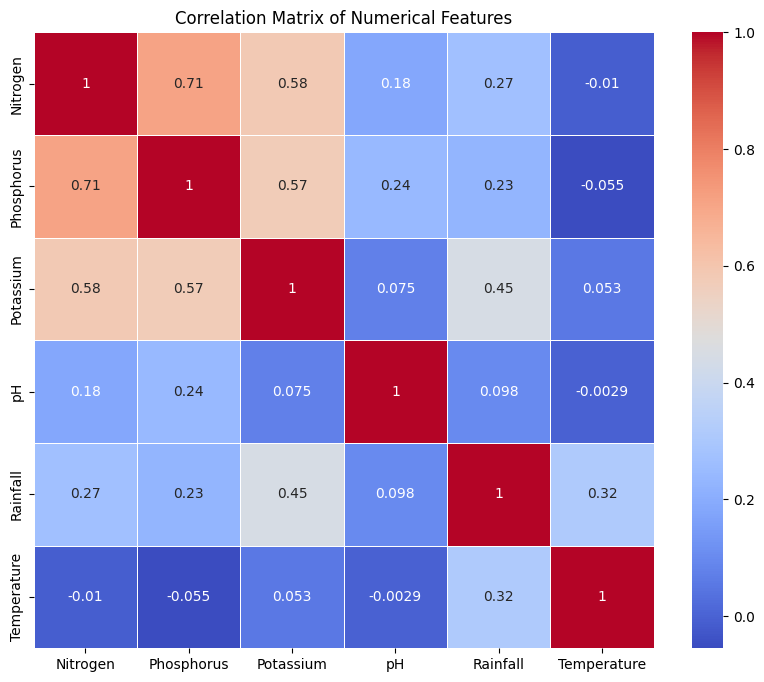

In [9]:
#we can begin by examining correlations between the numerical features and visualizing their relationships. We can also look at the distribution of categorical features with respect to the target label.


# Select numerical columns
numerical_cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']

# Calculate correlation matrix
corr_matrix = data[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


Purpose of correlation:

Insight into Relationships: Understanding the degree of correlation between different features allows you to gain insights into potential relationships within the data. For instance, if two features are highly positively correlated, it could indicate that they tend to increase together.

Data Understanding: Correlation analysis is a fundamental step in exploratory data analysis, helping to understand the data structure and the dynamics that govern it.

Informing Feature Engineering: Understanding correlations can guide the creation of new features that better capture the underlying patterns in the data, which can improve model performance.

# Data Analysis to develop better understanding for testing  purpose

# Check the Summary for all the crops

In [10]:
print("Average Ratio of Nitrogen in the Soil : {0:.2f}".format(data['Nitrogen'].mean()))
print("Average Ratio of Phosphorous in the Soil : {0:.2f}".format(data['Phosphorus'].mean()))
print("Average Ratio of Potassium in the Soil : {0:.2f}".format(data['Potassium'].mean()))
print("Average Temperature in Celsius : {0:.2f}".format(data['Temperature'].mean()))
print("Average PH Value of the soil : {0:.2f}".format(data['pH'].mean()))
print("Average Rainfall in mm : {0:.2f}".format(data['Rainfall'].mean()))

Average Ratio of Nitrogen in the Soil : 95.41
Average Ratio of Phosphorous in the Soil : 54.34
Average Ratio of Potassium in the Soil : 63.60
Average Temperature in Celsius : 25.92
Average PH Value of the soil : 6.72
Average Rainfall in mm : 819.19


# Check the Summary Statistics for each of the Crops

In [11]:

from ipywidgets import interact

@interact

def summary(crops = list(data['Crop'].value_counts().index)):
    x = data[data['Crop'] == crops]
    print("---------------------------------------------")
    print("Statistics for Nitrogen")
    print("Minimum Nitrigen required :", x['Nitrogen'].min())
    print("Average Nitrogen required :", x['Nitrogen'].mean())
    print("Maximum Nitrogen required :", x['Nitrogen'].max()) 
    print("---------------------------------------------")
    print("Statistics for Phosphorous")
    print("Minimum Phosphorous required :", x['Phosphorus'].min())
    print("Average Phosphorous required :", x['Phosphorus'].mean())
    print("Maximum Phosphorous required :", x['Phosphorus'].max()) 
    print("---------------------------------------------")
    print("Statistics for Potassium")
    print("Minimum Potassium required :", x['Potassium'].min())
    print("Average Potassium required :", x['Potassium'].mean())
    print("Maximum Potassium required :", x['Potassium'].max()) 
    print("---------------------------------------------")
    print("Statistics for Temperature")
    print("Minimum Temperature required : {0:.2f}".format(x['Temperature'].min()))
    print("Average Temperature required : {0:.2f}".format(x['Temperature'].mean()))
    print("Maximum Temperature required : {0:.2f}".format(x['Temperature'].max()))
    print("---------------------------------------------")
    print("Statistics for PH")
    print("Minimum PH required : {0:.2f}".format(x['pH'].min()))
    print("Average PH required : {0:.2f}".format(x['pH'].mean()))
    print("Maximum PH required : {0:.2f}".format(x['pH'].max()))
    print("---------------------------------------------")
    print("Statistics for Rainfall")
    print("Minimum Rainfall required : {0:.2f}".format(x['Rainfall'].min()))
    print("Average Rainfall required : {0:.2f}".format(x['Rainfall'].mean()))
    print("Maximum Rainfall required : {0:.2f}".format(x['Rainfall'].max()))


interactive(children=(Dropdown(description='crops', options=('Sugarcane', 'Wheat', 'Cotton', 'Jowar', 'Maize',…

# Check the distribution of the target variable 'Crop'

In [12]:
crop_distribution = data['Crop'].value_counts()
crop_distribution

Crop
Sugarcane    1010
Wheat         859
Cotton        650
Jowar         394
Maize         350
Rice          309
Groundnut     177
Tur           126
Ginger        125
Grapes        125
Urad           99
Moong          99
Gram           78
Turmeric       55
Soybean        45
Masoor         12
Name: count, dtype: int64

# Compare the Average Requirement for each crops with average conditions

In [13]:


@interact
def compare(conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']):
    print("Average Value for", conditions,"is {0:.2f}".format(data[conditions].mean()))
    print("----------------------------------------------")
    print("Sugarcane : {0:.2f}".format(data[(data['Crop'] == 'Sugarcane')][conditions].mean()))
    print("Wheat : {0:.2f}".format(data[data['Crop'] == 'Wheat'][conditions].mean()))
    print("Cotton  : {0:.2f}".format(data[(data['Crop'] == 'Cotton ')][conditions].mean()))
    print("Jowar : {0:.2f}".format(data[data['Crop'] == 'Jowar'][conditions].mean()))
    print("Maize : {0:.2f}".format(data[(data['Crop'] == 'Maize')][conditions].mean()))
    print("Rice  : {0:.2f}".format(data[data['Crop'] == 'Rice '][conditions].mean()))
    print("Groundnut : {0:.2f}".format(data[(data['Crop'] == 'Groundnut')][conditions].mean()))
    print("Tur : {0:.2f}".format(data[data['Crop'] == 'Tur'][conditions].mean()))
    print("Ginger   : {0:.2f}".format(data[(data['Crop'] == 'Ginger')][conditions].mean()))
    print("Grapes : {0:.2f}".format(data[data['Crop'] == 'Grapes'][conditions].mean()))
    print("Urad: {0:.2f}".format(data[(data['Crop'] == 'Urad')][conditions].mean()))
    print("Moong : {0:.2f}".format(data[data['Crop'] == 'Moong'][conditions].mean()))
    print("Gram : {0:.2f}".format(data[(data['Crop'] == 'Gram')][conditions].mean()))
    print("Turmeric   : {0:.2f}".format(data[data['Crop'] == 'Turmeric'][conditions].mean()))
    print("Soybean : {0:.2f}".format(data[(data['Crop'] == 'Soybean')][conditions].mean()))
    print("Masoor : {0:.2f}".format(data[data['Crop'] == 'Masoor'][conditions].mean()))
   


interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'pH',…

# Crops Grouped by Nitrogen Requirements:

In [14]:

@interact
def compare(conditions = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']):
  
    print("Crops which require greater than average", conditions,'\n')
    print(data[data[conditions] > data[conditions].mean()]['Crop'].unique())
    print("----------------------------------------------")
    print("Crops which require less than average", conditions,'\n')
    print(data[data[conditions] <= data[conditions].mean()]['Crop'].unique())

interactive(children=(Dropdown(description='conditions', options=('Nitrogen', 'Phosphorus', 'Potassium', 'pH',…

# "Interactive Fertilizer Recommendations for Different Crops"

In [15]:
@interact
def show_fertilizers_for_crop(crop=data['Crop'].unique()):
    Fertilizers = data[data['Crop'] == crop]['Fertilizer'].unique()
    print(f"Fertilizers used for {crop}:")
    for Fertilizer in Fertilizers:
        print(f"- {Fertilizer}")


interactive(children=(Dropdown(description='crop', options=('Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', '…

# "Interactive Display of Soil Colors Associated with Different Crops"

In [16]:
# Define the interactive function
@interact
def show_soil_colors_for_crop(crop=data['Crop'].unique()):
    soil_colors = data[data['Crop'] == crop]['Soil_color'].unique()
    print(f"Soil colors typically associated with {crop}:")
    for soil_color in soil_colors:
        print(f"- {soil_color}")

interactive(children=(Dropdown(description='crop', options=('Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', '…

# "Interactive Exploration: Numerical Averages and Unique Categorical Values for Selected Crop"

In [17]:
# Numerical features
numerical_features = ['Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature']

# Categorical features
categorical_features = ['District_Name', 'Soil_color', 'Fertilizer']

@interact
def explore_crop_features(crop=data['Crop'].unique()):
    # Display average values of numerical features
    print("Average values of numerical features:")
    avg_values = data[data['Crop'] == crop][numerical_features].mean()
    for feature, value in avg_values.items():
        print(f"{feature}: {value:.2f}")
    print("\n")
    
    # Display unique values of categorical features
    print("Unique values of categorical features:")
    for feature in categorical_features:
        unique_vals = data[data['Crop'] == crop][feature].unique()
        print(f"{feature}: {', '.join(unique_vals)}")
    print("\n")

interactive(children=(Dropdown(description='crop', options=('Sugarcane', 'Jowar', 'Cotton', 'Rice', 'Wheat', '…

## Distribution of Target variable

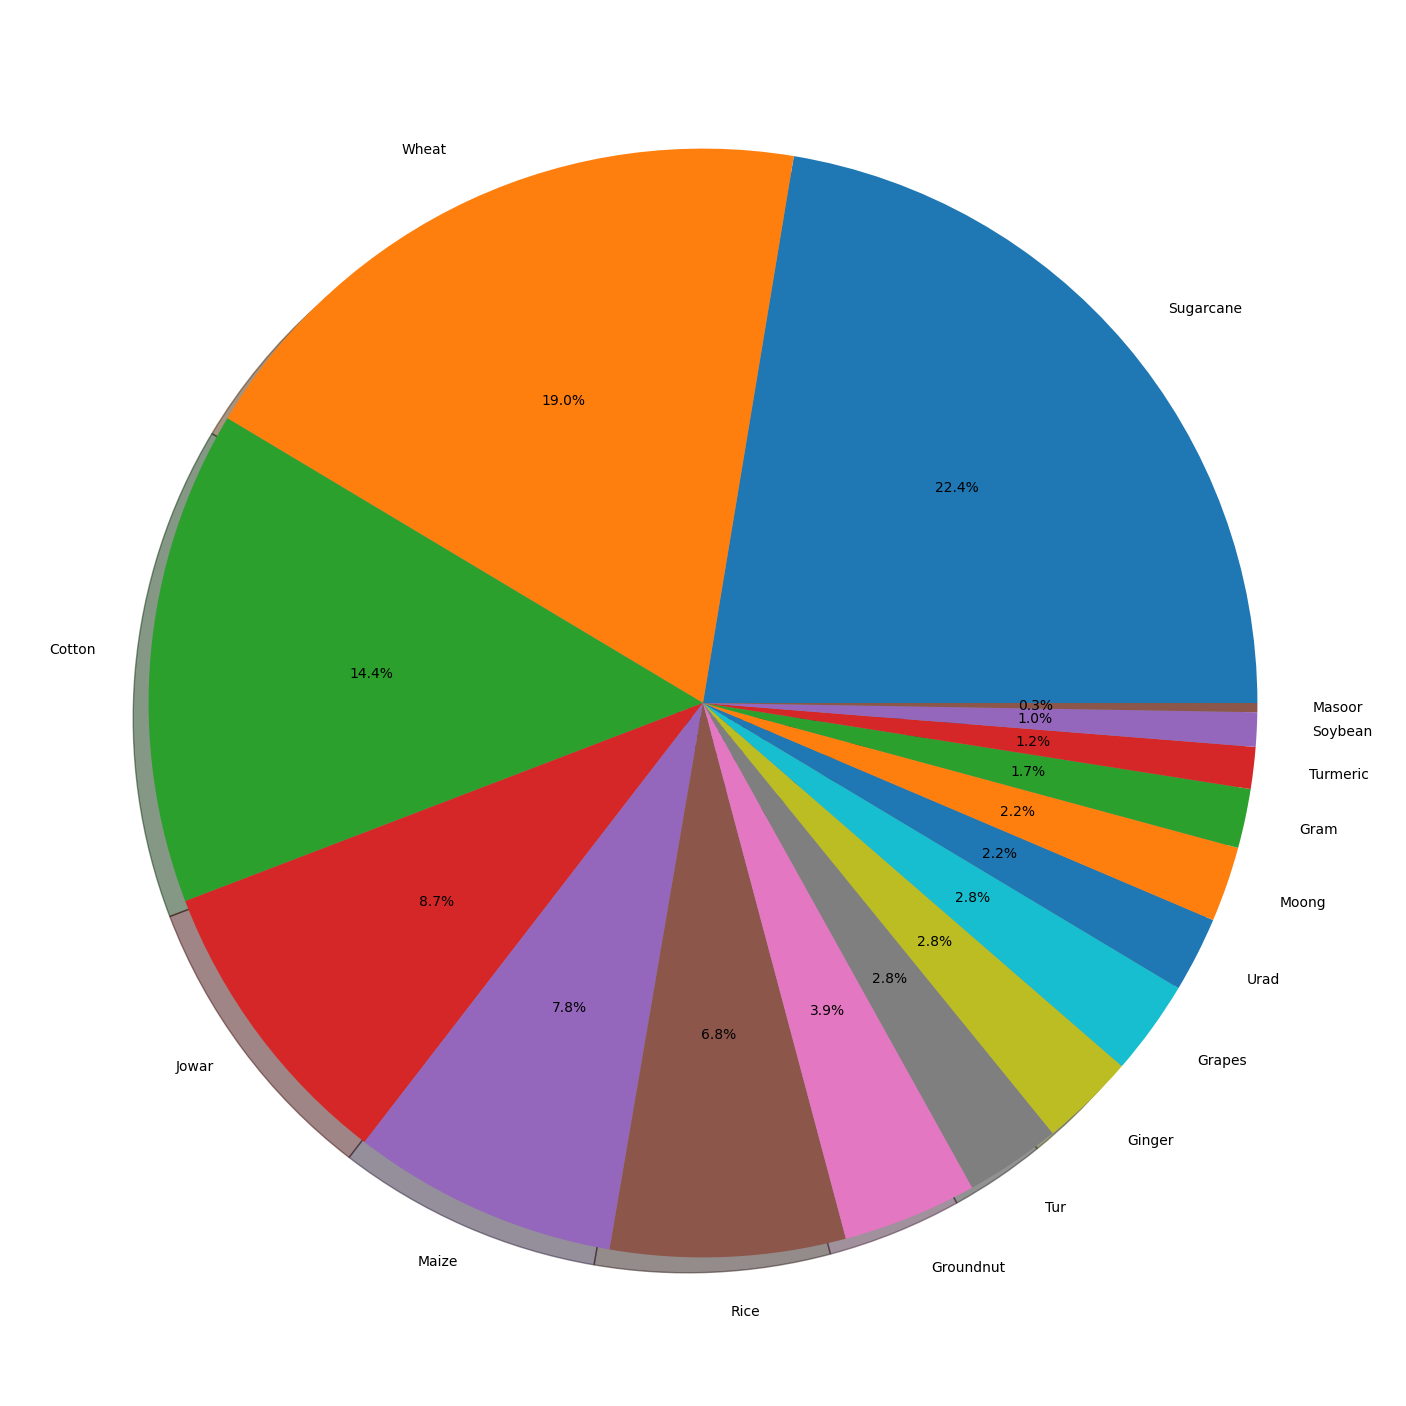

In [18]:
label_name = data['Crop'].value_counts().index
val = data['Crop'].value_counts().values


plt.figure(figsize = (32,18))
plt.pie(x = val , labels  = label_name , shadow = True , autopct = '%1.1f%%')
plt.show()

# Encoding categorical features

In [19]:
label_encoders = {}
categorical_features = ['District_Name', 'Soil_color', 'Fertilizer']

for col in categorical_features:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le



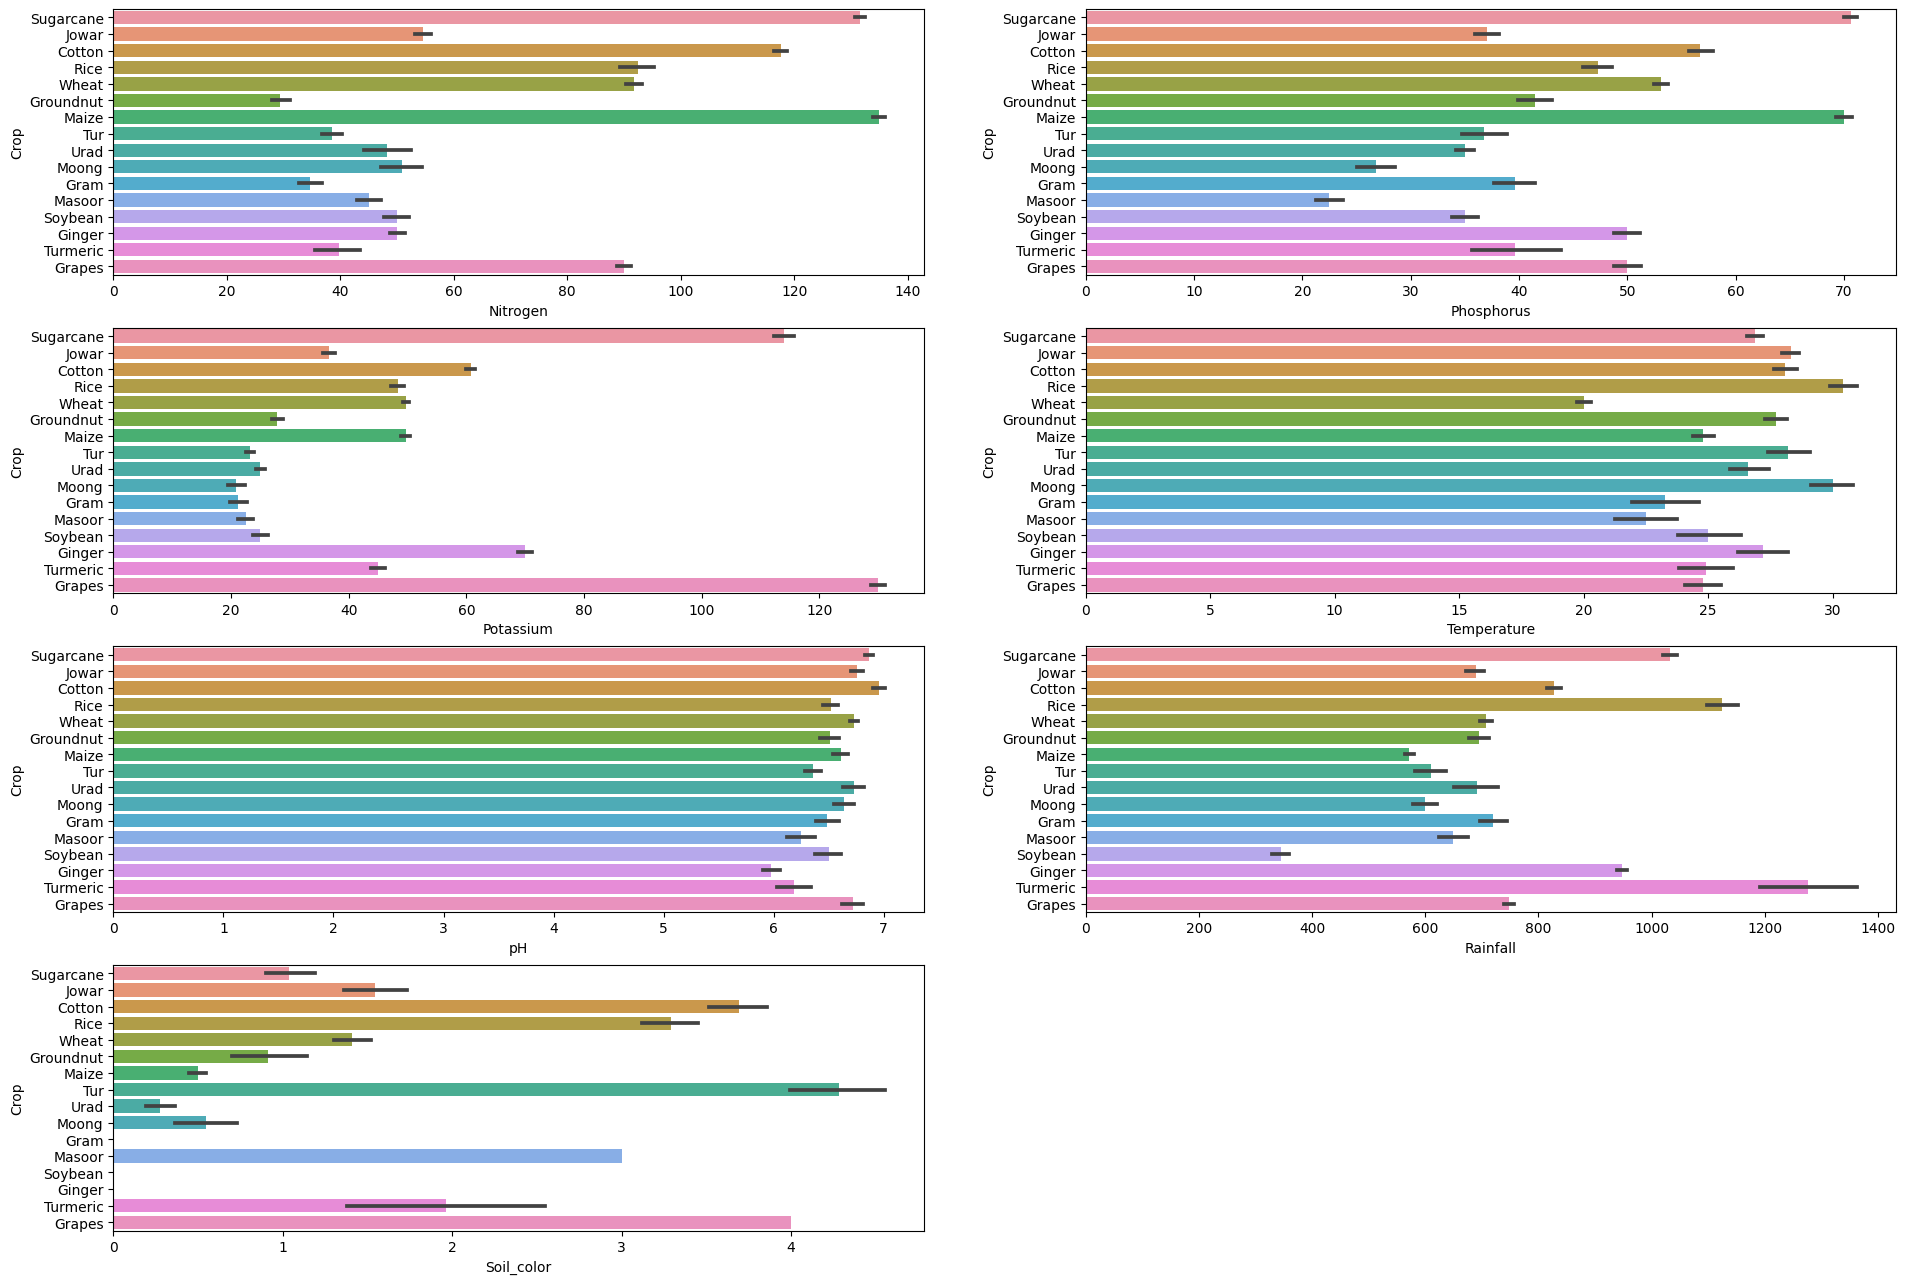

In [20]:
cols = ['Nitrogen', 'Phosphorus', 'Potassium', 'Temperature', 'pH',
       'Rainfall','Soil_color' ]
target = 'Crop'

def create_barplots(data , cols) :
    
    i = 1
    plt.figure(figsize = (23,20))
    for col_name in cols:
        plt.subplot(5,2,i)
        sns.barplot(data = data , x = col_name , y = target)
        i += 1 
        
create_barplots(data , cols)

# Interpretation :

Maize requires more nitrogen compare to other label crop.

Sugarcane requires more phosphorous compare to other label crop.

Grapes requires most potassium compare to other label crop.

Rice requires highest temperature compare to other label crop.

Cotton and grapes require high ph compare to other label crop.

Turmeric requires most heavy rainfall compare to other label crop.

Tur requires darker soil color compare to other label crop.

# Splitting the data into training and testing sets

In [21]:

X = data.drop(columns=['Crop', 'Link']).values
y = data['Crop'].values

## Interpretation 
### 'Link' column: 'Link' refers to URLs, it might not have predictive power in determining the crop type and could introduce noise to the model. 
# exclude non-informative features to streamline the model and improve its interpretability.



## "Training and Evaluating a Random Forest Classifier: Feature Importance Analysis"

In [22]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
# List of feature names, excluding the ones you've dropped
feature_names = ['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Fertilizer']

# Assuming clf is your trained model
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Now you can display or plot the feature importances
features_df


# # Get feature importances
# feature_importances = clf.feature_importances_

# # Create a DataFrame for visualization
# features_df = pd.DataFrame({
#     'Feature': X.columns,
#     'Importance': feature_importances
# })

# # Sort by importance
# features_df = features_df.sort_values(by='Importance', ascending=False)

# features_df


,Feature,Importance
4,Potassium,0.190413
2,Nitrogen,0.167921
1,Soil_color,0.138527
6,Rainfall,0.129037
0,District_Name,0.119023
8,Fertilizer,0.088090
3,Phosphorus,0.081866
7,Temperature,0.060366
5,pH,0.024760


# "Feature Scaling: Standardizing Training and Testing Data"

In [23]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [24]:
X_train.shape

(3610, 9)

In [25]:
X_test.shape

(903, 9)

In [26]:
y_train.shape

(3610,)

In [27]:
y_test.shape


(903,)

# "Feature Distributions in the Dataset"

In [28]:

# Get the column names excluding the ones you've dropped
columns = data.drop(columns=['Crop', 'Link']).columns

# Now you can use 'columns' for your purposes
# For example, if you want to print them
print(columns)


Index(['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium',
       'pH', 'Rainfall', 'Temperature', 'Fertilizer'],
      dtype='object')


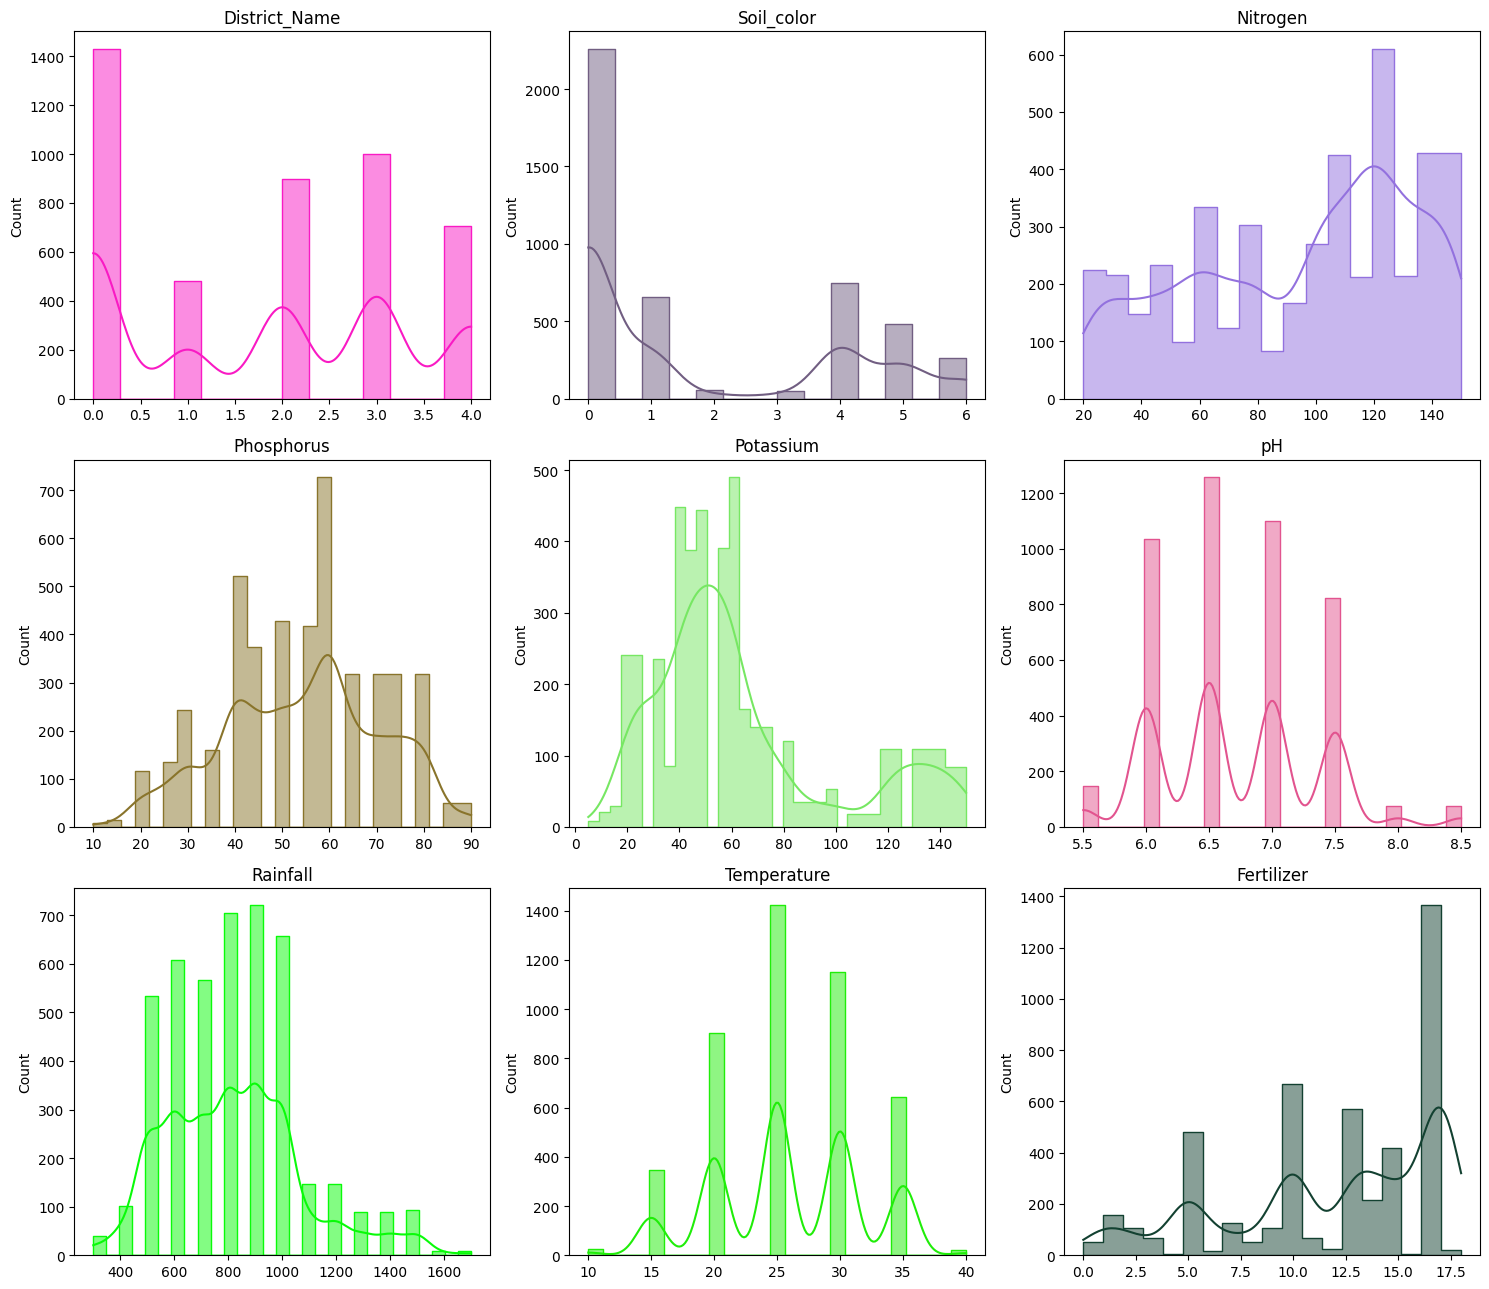

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Column names
columns = ['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Fertilizer']

# Set up the matplotlib figure
plt.figure(figsize=(15, 13))

# Loop through each column to create a subplot for each feature
for i, column in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    rgb = np.random.rand(3,)
    # Use the index to access the data in X (assuming the order of columns in X matches the order in 'columns')
    sns.histplot(X[:, i-1], kde=True, color=rgb, element='step')
    plt.title(column)

plt.tight_layout()
plt.show()


District_Name:

This appears to be a categorical feature, where each number represents a different district.
The distribution shows that some districts (like the first and fourth) have more observations, while others have fewer.
Soil_color:

Also a categorical feature, likely representing different types of soil colors.
Most of the data seems to be distributed around colors 0 and 2.
Nitrogen:

The nitrogen concentration in the soil appears to have two major peaks: one around 25 and another close to 100.
This might suggest that there are certain areas or districts with high nitrogen concentration and others with low concentration.
Phosphorus:

The distribution indicates that the majority of observations have phosphorus levels around 40, but there's a wide spread, with some soils having very low phosphorus and others having much higher levels.
Potassium:

Most of the soils have potassium levels around 50, but there's a significant tail extending towards higher levels, indicating some soils have very high potassium.
pH:

pH levels are mostly concentrated between 6 to 8, which is typical for many soils. It's close to neutral, which is good for many crops.
There are multiple peaks, suggesting that different areas or districts might have slightly different pH averages.
Rainfall:

The distribution indicates that the majority of observations receive rainfall between 500 to 1000 units (perhaps mm/year).
There's a noticeable drop in observations with rainfall above 1000 units, suggesting such high rainfall might be rare or specific to certain regions.
Temperature:

Most of the observations show temperatures around 20 units (perhaps °C), indicating a moderate climate.
There's a decline in observations as temperature increases, which might suggest that extremely high temperatures are less common in this dataset.

# Model Comparisons

In [30]:
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", category=RuntimeWarning, message="Precision loss occurred in moment calculation*")


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train models
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)

random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Make predictions on the test set
random_forest_predictions = random_forest.predict(X_test)
decision_tree_predictions = decision_tree.predict(X_test)
svm_predictions = svm.predict(X_test)

# Function to calculate error rates
def calculate_error_rate(predictions, true_labels):
    return np.sum(predictions != true_labels) / len(true_labels)

# Calculate error rates for each algorithm
data['random_forest_error'] = calculate_error_rate(random_forest_predictions, y_test)
data['decision_tree_error'] = calculate_error_rate(decision_tree_predictions, y_test)
data['svm_error'] = calculate_error_rate(svm_predictions, y_test)


f_statistic, p_value = f_oneway(data['random_forest_error'], data['decision_tree_error'], data['svm_error'])

# Perform t-tests for the difference in means
t_statistic_rf_dt, p_value_rf_dt = ttest_ind(data['random_forest_error'], data['decision_tree_error'])
t_statistic_rf_svm, p_value_rf_svm = ttest_ind(data['random_forest_error'], data['svm_error'])
t_statistic_dt_svm, p_value_dt_svm = ttest_ind(data['decision_tree_error'], data['svm_error'])


confidence_level = 0.95

# Function to calculate the confidence interval
def calculate_confidence_interval(t_statistic, se_diff, df, confidence_level):
    alpha = 1 - confidence_level
    critical_value = t.ppf(1 - alpha / 2, df)
    margin_of_error = critical_value * se_diff
    lower_bound = t_statistic - margin_of_error
    upper_bound = t_statistic + margin_of_error
    return lower_bound, upper_bound

# Function to print the result for each pair of models
def print_result(t_statistic, p_value, model1, model2, error_diff, se_diff, df):
    conf_interval = calculate_confidence_interval(t_statistic, se_diff, df, confidence_level)
    print(f"\nResults for {model1} vs {model2}:")
    print(f"Confidence Interval: {conf_interval}")
    
    if p_value < (1 - confidence_level) / 2:
        print(f"The error rate difference between {model1} and {model2} is statistically significant at {confidence_level * 100}% confidence level.")
        if error_diff > 0:
            print(f"Selected Model: {model1}")
        elif error_diff < 0:
            print(f"Selected Model: {model2}")
        else:
            print(f"Selected Model: {model2}")
    else:
        print(f"The confidence interval contains 0; therefore, the difference in error rates between {model1} and {model2} may not be statistically significant at {confidence_level * 100}% confidence level.")

# Perform a t-test for the difference in means between SVM and Random Forest
t_statistic_svm_rf, p_value_svm_rf = ttest_ind(data['svm_error'], data['random_forest_error'])

# Perform a t-test for the difference in means between SVM and Decision Tree
t_statistic_svm_dt, p_value_svm_dt = ttest_ind(data['svm_error'], data['decision_tree_error'])

# Perform a t-test for the difference in means between Random Forest and Decision Tree
t_statistic_rf_dt, p_value_rf_dt = ttest_ind(data['random_forest_error'], data['decision_tree_error'])







C:\Users\mehre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\scipy\stats\_stats_py.py:4167: ConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(stats.ConstantInputWarning(msg))


## 'SVM' VS'Random Forest

In [31]:
# Print results for the comparisons
print_result(t_statistic_svm_rf, p_value_svm_rf, 'SVM', 'Random Forest',data['random_forest_error'].mean() - data['svm_error'].mean(),np.sqrt((data['random_forest_error'].var() / len(y_test)) + (data['svm_error'].var() / len(y_test))), len(y_test) - 1)




Results for SVM vs Random Forest:
Confidence Interval: (4.8348489685446714e+17, 4.8348489685446714e+17)
The error rate difference between SVM and Random Forest is statistically significant at 95.0% confidence level.
Selected Model: Random Forest


## SVM' VS 'Decision Tree

In [32]:
print_result(t_statistic_svm_dt, p_value_svm_dt, 'SVM', 'Decision Tree', data['decision_tree_error'].mean() - data['svm_error'].mean(), np.sqrt((data['decision_tree_error'].var() / len(y_test)) + (data['svm_error'].var() / len(y_test))), len(y_test) - 1)




Results for SVM vs Decision Tree:
Confidence Interval: (4.629205131106593e+17, 4.629205131106593e+17)
The error rate difference between SVM and Decision Tree is statistically significant at 95.0% confidence level.
Selected Model: Decision Tree


## 'Random Forest' VS 'Decision Tree'

In [33]:
print_result(t_statistic_rf_dt, p_value_rf_dt, 'Random Forest', 'Decision Tree', data['decision_tree_error'].mean() - data['random_forest_error'].mean(), np.sqrt((data['decision_tree_error'].var() / len(y_test)) + (data['random_forest_error'].var() / len(y_test))), len(y_test) - 1)



Results for Random Forest vs Decision Tree:
Confidence Interval: (-3.14577973554108e+17, -3.14577973554108e+17)
The error rate difference between Random Forest and Decision Tree is statistically significant at 95.0% confidence level.
Selected Model: Random Forest


## Best Model

In [34]:
# Create a dictionary to store the error rates and p-values for each model
model_results = {
    'SVM': {'error_rate': data['svm_error'].mean(), 'p_value': p_value_svm_rf},
    'Random Forest': {'error_rate': data['random_forest_error'].mean(), 'p_value': p_value_rf_dt},
    'Decision Tree': {'error_rate': data['decision_tree_error'].mean(), 'p_value': p_value_svm_dt}
}

# Find the model with the lowest mean error rate
overall_best_model = min(model_results, key=lambda model: model_results[model]['error_rate'])

# Print the overall best model
print(f"\nOverall Best Model: {overall_best_model}")


Overall Best Model: Random Forest


## ROC CURVE

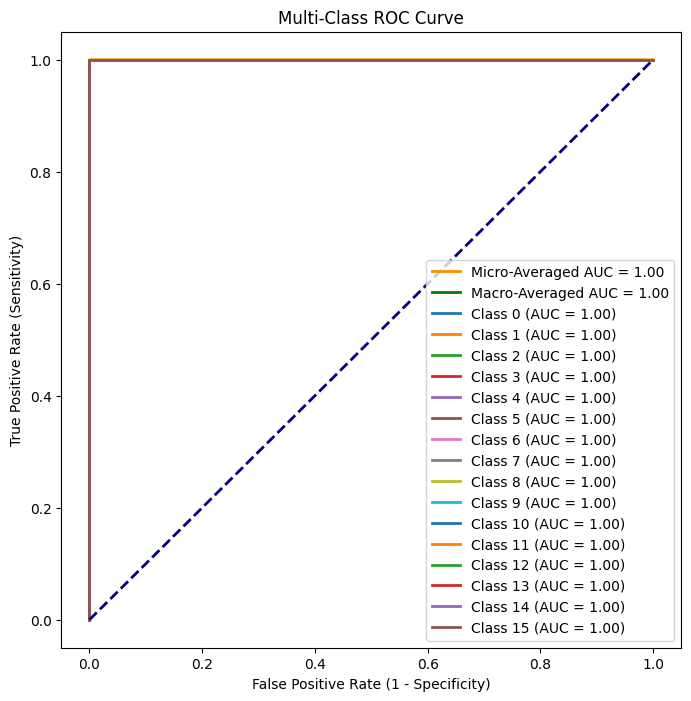

In [35]:

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score


classes = np.unique(y_train)
num_classes = len(classes)

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get predicted probabilities for each class
y_pred_prob = random_forest.predict_proba(X_test)

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc[i] = roc_auc_score(y_true_bin[:, i], y_pred_prob[:, i])

# Micro-average ROC curve and ROC area
fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_prob.ravel())
roc_auc_micro = roc_auc_score(y_true_bin, y_pred_prob, average="micro")

# Macro-average ROC curve and ROC area
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(num_classes)]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(num_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= num_classes
fpr_macro = all_fpr
tpr_macro = mean_tpr
roc_auc_macro = roc_auc_score(y_true_bin, y_pred_prob, average="macro")

# Plotting
plt.figure(figsize=(8, 8))
plt.plot(fpr_micro, tpr_micro, color='darkorange', lw=2, label=f'Micro-Averaged AUC = {roc_auc_micro:.2f}')
plt.plot(fpr_macro, tpr_macro, color='green', lw=2, label=f'Macro-Averaged AUC = {roc_auc_macro:.2f}')

for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Multi-Class ROC Curve')
plt.legend(loc='lower right')
plt.show()


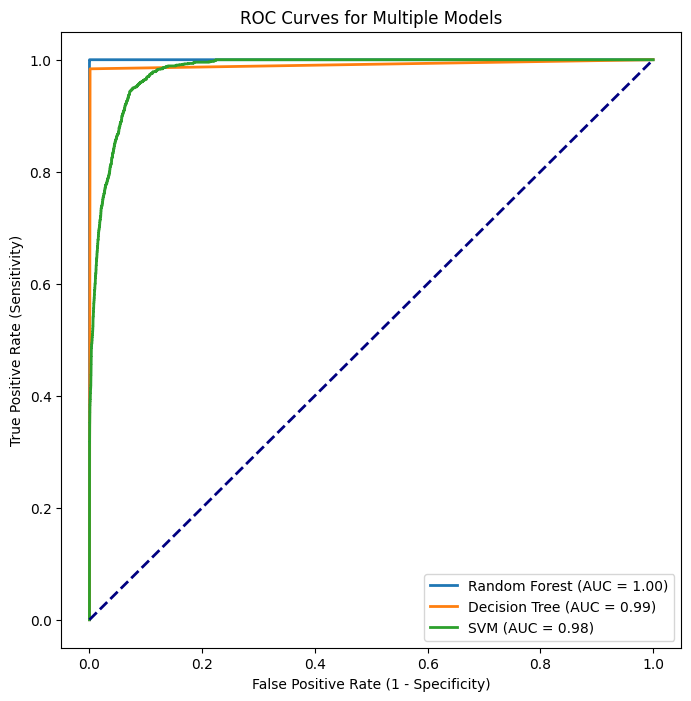

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have trained models: random_forest, decision_tree, and svm
random_forest = RandomForestClassifier(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42, probability=True)  # Set probability to True for SVM

# Train models
random_forest.fit(X_train, y_train)
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Assuming 'classes' is a list of unique class labels
classes = np.unique(y_train)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Get predicted probabilities for each class for all three models
rf_pred_prob = random_forest.predict_proba(X_test)
dt_pred_prob = decision_tree.predict_proba(X_test)
svm_pred_prob = svm.predict_proba(X_test)

# Binarize the true labels
y_true_bin = label_binarize(y_test, classes=classes)

# Function to plot ROC curves for all models on a single graph
def plot_roc_curves(models, model_names, y_true_bin, y_pred_probs):
    plt.figure(figsize=(8, 8))

    for i in range(len(models)):
        fpr_micro, tpr_micro, _ = roc_curve(y_true_bin.ravel(), y_pred_probs[i].ravel())
        roc_auc_micro = auc(fpr_micro, tpr_micro)

        # Plot ROC curve for each model
        plt.plot(fpr_micro, tpr_micro, lw=2, label=f'{model_names[i]} (AUC = {roc_auc_micro:.2f})')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('ROC Curves for Multiple Models')
    plt.legend(loc='lower right')
    plt.show()

# Plot ROC curves for all three models
models = [random_forest, decision_tree, svm]
model_names = ['Random Forest', 'Decision Tree', 'SVM']
pred_probs = [random_forest.predict_proba(X_test), decision_tree.predict_proba(X_test), svm.predict_proba(X_test)]

plot_roc_curves(models, model_names, y_true_bin, pred_probs)

In [37]:
# List of feature names, excluding the ones you've dropped
feature_names = ['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Fertilizer']

# Assuming clf is your trained model
feature_importances = clf.feature_importances_

# Create a DataFrame for visualization
features_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
})

# Sort by importance
features_df = features_df.sort_values(by='Importance', ascending=False)

# Now you can display or plot the feature importances
print(features_df)


         Feature  Importance
4      Potassium    0.190413
2       Nitrogen    0.167921
1     Soil_color    0.138527
6       Rainfall    0.129037
0  District_Name    0.119023
8     Fertilizer    0.088090
3     Phosphorus    0.081866
7    Temperature    0.060366
5             pH    0.024760


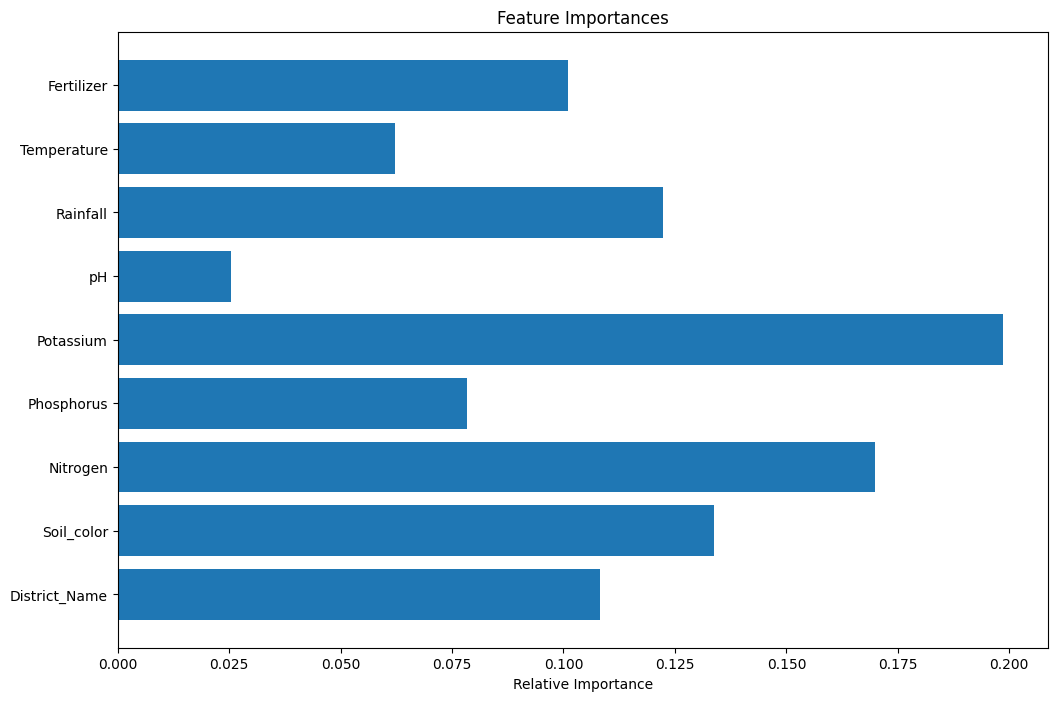

In [38]:
# Convert X_train to a DataFrame if it's not already
X_train_df = pd.DataFrame(X_train, columns=['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Fertilizer'])

# Get feature importances
importances = random_forest.feature_importances_
features = X_train_df.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
plt.title("Feature Importances")
plt.barh(range(len(features)), importances, align="center")
plt.yticks(range(len(features)), features)
plt.xlabel("Relative Importance")
plt.show()


In [39]:

X = data.drop(columns=['Crop']).values
y = data['Crop'].values.reshape(-1,1)

In [40]:
class Node():
    """
    A class representing a node in a decision tree.
    """

    def __init__(self, feature=None, threshold=None, left=None, right=None, gain=None, value=None):
        """
        Initializes a new instance of the Node class.

        Args:
            feature: The feature used for splitting at this node. Defaults to None.
            threshold: The threshold used for splitting at this node. Defaults to None.
            left: The left child node. Defaults to None.
            right: The right child node. Defaults to None.
            gain: The gain of the split. Defaults to None.
            value: If this node is a leaf node, this attribute represents the predicted value
                for the target variable. Defaults to None.
        """
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain
        self.value = value

In [41]:
class DecisionTree():
    """
    A decision tree classifier for binary classification problems.
    """

    def __init__(self, min_samples=5, max_depth=3):
        """
        Constructor for DecisionTree class.

        Parameters:
            min_samples (int): Minimum number of samples required to split an internal node.
            max_depth (int): Maximum depth of the decision tree.
        """
        self.min_samples = min_samples
        self.max_depth = max_depth

    def split_data(self, dataset, feature, threshold):
        """
        Splits the given dataset into two datasets based on the given feature and threshold.

        Parameters:
            dataset (ndarray): Input dataset.
            feature (int): Index of the feature to be split on.
            threshold (float): Threshold value to split the feature on.

        Returns:
            left_dataset (ndarray): Subset of the dataset with values less than or equal to the threshold.
            right_dataset (ndarray): Subset of the dataset with values greater than the threshold.
        """
        # Create empty arrays to store the left and right datasets
        left_dataset = []
        right_dataset = []
        
        # Loop over each row in the dataset and split based on the given feature and threshold
        for row in dataset:
            if row[feature] <= threshold:
                left_dataset.append(row)
            else:
                right_dataset.append(row)

        # Convert the left and right datasets to numpy arrays and return
        left_dataset = np.array(left_dataset)
        right_dataset = np.array(right_dataset)
        return left_dataset, right_dataset

    def entropy(self, y):
        """
        Computes the entropy of the given label values.

        Parameters:
            y (ndarray): Input label values.

        Returns:
            entropy (float): Entropy of the given label values.
        """
        entropy = 0

        # Find the unique label values in y and loop over each value
        labels = np.unique(y)
        for label in labels:
            # Find the examples in y that have the current label
            label_examples = y[y == label]
            # Calculate the ratio of the current label in y
            pl = len(label_examples) / len(y)
            # Calculate the entropy using the current label and ratio
            entropy += -pl * np.log2(pl)

        # Return the final entropy value
        return entropy

    def information_gain(self, parent, left, right):
        """
        Computes the information gain from splitting the parent dataset into two datasets.

        Parameters:
            parent (ndarray): Input parent dataset.
            left (ndarray): Subset of the parent dataset after split on a feature.
            right (ndarray): Subset of the parent dataset after split on a feature.

        Returns:
            information_gain (float): Information gain of the split.
        """
        # set initial information gain to 0
        information_gain = 0
        # compute entropy for parent
        parent_entropy = self.entropy(parent)
        # calculate weight for left and right nodes
        weight_left = len(left) / len(parent)
        weight_right= len(right) / len(parent)
        # compute entropy for left and right nodes
        entropy_left, entropy_right = self.entropy(left), self.entropy(right)
        # calculate weighted entropy 
        weighted_entropy = weight_left * entropy_left + weight_right * entropy_right
        # calculate information gain 
        information_gain = parent_entropy - weighted_entropy
        return information_gain

    
    def best_split(self, dataset, num_samples, num_features):
        """
        Finds the best split for the given dataset.

        Args:
        dataset (ndarray): The dataset to split.
        num_samples (int): The number of samples in the dataset.
        num_features (int): The number of features in the dataset.

        Returns:
        dict: A dictionary with the best split feature index, threshold, gain, 
              left and right datasets.
        """
        # dictionary to store the best split values
        best_split = {'gain':- 1, 'feature': None, 'threshold': None}
        # loop over all the features
        for feature_index in range(num_features):
            #get the feature at the current feature_index
            feature_values = dataset[:, feature_index]
            #get unique values of that feature
            thresholds = np.unique(feature_values)
            # loop over all values of the feature
            for threshold in thresholds:
                # get left and right datasets
                left_dataset, right_dataset = self.split_data(dataset, feature_index, threshold)
                # check if either datasets is empty
                if len(left_dataset) and len(right_dataset):
                    # get y values of the parent and left, right nodes
                    y, left_y, right_y = dataset[:, -1], left_dataset[:, -1], right_dataset[:, -1]
                    # compute information gain based on the y values
                    information_gain = self.information_gain(y, left_y, right_y)
                    # update the best split if conditions are met
                    if information_gain > best_split["gain"]:
                        best_split["feature"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["left_dataset"] = left_dataset
                        best_split["right_dataset"] = right_dataset
                        best_split["gain"] = information_gain
        return best_split

    
    def calculate_leaf_value(self, y):
        """
        Calculates the most occurring value in the given list of y values.

        Args:
            y (list): The list of y values.

        Returns:
            The most occurring value in the list.
        """
        y = list(y)
        #get the highest present class in the array
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value
    
    def build_tree(self, dataset, current_depth=0):
        """
        Recursively builds a decision tree from the given dataset.

        Args:
        dataset (ndarray): The dataset to build the tree from.
        current_depth (int): The current depth of the tree.

        Returns:
        Node: The root node of the built decision tree.
        """
        # split the dataset into X, y values
        X, y = dataset[:, :-1], dataset[:, -1]
        n_samples, n_features = X.shape
        # keeps spliting until stopping conditions are met
        if n_samples >= self.min_samples and current_depth <= self.max_depth:
            # Get the best split
            best_split = self.best_split(dataset, n_samples, n_features)
            # Check if gain isn't zero
            if best_split["gain"]:
                # continue splitting the left and the right child. Increment current depth
                left_node = self.build_tree(best_split["left_dataset"], current_depth + 1)
                right_node = self.build_tree(best_split["right_dataset"], current_depth + 1)
                # return decision node
                return Node(best_split["feature"], best_split["threshold"],
                            left_node, right_node, best_split["gain"])

        # compute leaf node value
        leaf_value = self.calculate_leaf_value(y)
        # return leaf node value
        return Node(value=leaf_value)
    
    def fit(self, X, y):
        """
        Builds and fits the decision tree to the given X and y values.

        Args:
        X (ndarray): The feature matrix.
        y (ndarray): The target values.
        """
        dataset = np.concatenate((X, y), axis=1)  
        self.root = self.build_tree(dataset)

    def predict(self, X):
        """
        Predicts the class labels for each instance in the feature matrix X.

        Args:
        X (ndarray): The feature matrix to make predictions for.

        Returns:
        list: A list of predicted class labels.
        """
        # Create an empty list to store the predictions
        predictions = []
        # For each instance in X, make a prediction by traversing the tree
        for x in X:
            prediction = self.make_prediction(x, self.root)
            # Append the prediction to the list of predictions
            predictions.append(prediction)
        # Convert the list to a numpy array and return it
        np.array(predictions)
        return predictions
    
    def make_prediction(self, x, node):
        """
        Traverses the decision tree to predict the target value for the given feature vector.

        Args:
        x (ndarray): The feature vector to predict the target value for.
        node (Node): The current node being evaluated.

        Returns:
        The predicted target value for the given feature vector.
        """
        # if the node has value i.e it's a leaf node extract it's value
        if node.value != None: 
            return node.value
        else:
            #if it's node a leaf node we'll get it's feature and traverse through the tree accordingly
            feature = x[node.feature]
            if feature <= node.threshold:
                return self.make_prediction(x, node.left)
            else:
                return self.make_prediction(x, node.right)



In [42]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    ----------
        float: The accuracy of the model
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples) 

In [43]:
def balanced_accuracy(y_true, y_pred):
    """Calculate the balanced accuracy for a multi-class classification problem.

    Parameters
    ----------
        y_true (numpy array): A numpy array of true labels for each data point.
        y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns
    -------
        balanced_acc : The balanced accuracyof the model
        
    """
    y_pred = np.array(y_pred)
    y_true = y_true.flatten()
    # Get the number of classes
    n_classes = len(np.unique(y_true))

    # Initialize an array to store the sensitivity and specificity for each class
    sen = []
    spec = []
    # Loop over each class
    for i in range(n_classes):
        # Create a mask for the true and predicted values for class i
        mask_true = y_true == i
        mask_pred = y_pred == i

        # Calculate the true positive, true negative, false positive, and false negative values
        TP = np.sum(mask_true & mask_pred)
        TN = np.sum((mask_true != y_pred) & (mask_pred !=  y_pred))
        FP = np.sum((mask_true !=  y_pred) & mask_pred)
        FN = np.sum(mask_true & (mask_pred !=  y_pred))

        # Calculate the sensitivity (true positive rate) and specificity (true negative rate)
        sensitivity = TP / (TP + FN)
        specificity = TN / (TN + FP)

        # Store the sensitivity and specificity for class i
        sen.append(sensitivity)
        spec.append(specificity)
    # Calculate the balanced accuracy as the average of the sensitivity and specificity for each class
    average_sen =  np.mean(sen)
    average_spec =  np.mean(spec)
    balanced_acc = (average_sen + average_spec) / n_classes

    return balanced_acc
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=420, test_size=0.2)

In [44]:
X_train.shape

(3610, 13)

In [45]:
#create model instance
model = DecisionTree()

# Fit the decision tree model to the training data.
model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data.
predictions = model.predict(X_test)

# Calculate evaluating metrics
print(f"Decision Tree Accuracy: {accuracy(y_test, predictions)}")

Decision Tree Accuracy: 0.9357696566998892


In [46]:
# Create X by dropping the columns you don't want and the target variable 'Crop'
X = data.drop(columns=['Crop', 'Link', 'random_forest_error', 'decision_tree_error', 'svm_error']).values
y = data['Crop'].values

# Split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of X_train
print("Shape of X_train:", X_train.shape)


Shape of X_train: (3610, 9)


In [47]:
data.columns

Index(['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium',
       'pH', 'Rainfall', 'Temperature', 'Crop', 'Fertilizer', 'Link',
       'random_forest_error', 'decision_tree_error', 'svm_error'],
      dtype='object')

In [48]:

data = data.drop(columns=['Link', 'random_forest_error', 'decision_tree_error', 'svm_error'])


In [49]:

X = data.drop(columns=['Crop'],).values

y = data['Crop'].values.reshape(-1,1)

In [50]:

# X = data.drop(columns=['Crop', 'Link',
#        'random_forest_error', 'decision_tree_error', 'svm_error'],).values

# y = data['Crop'].values.reshape(-1,1)

# # Continue with your train-test split and SMOTE application
# ...


In [51]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import SMOTE
# from imblearn.under_sampling import RandomUnderSampler

# # Assuming 'data' is your DataFrame
# column_names = ['District_Name', 'Soil_color', 'Nitrogen', 'Phosphorus', 'Potassium', 'pH', 'Rainfall', 'Temperature', 'Fertilizer']
# X = data.drop(columns=['Crop']).values  # Adjust if you have more columns to exclude
# y = data['Crop'].values.reshape(-1, 1)

# # Splitting the dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Applying SMOTE for oversampling
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train.ravel())

# # Applying Random Under-sampling
# under_sampler = RandomUnderSampler(random_state=42)
# X_train_balanced, y_train_balanced = under_sampler.fit_resample(X_train_smote, y_train_smote)

# # Training the custom Random Forest on the balanced dataset
# random_forest = RandomForest(n_trees=7, max_depth=13, min_samples=2)
# random_forest.fit(X_train_balanced, y_train_balanced)

# # Make predictions
# predictions = random_forest.predict(X_test)



In [52]:
import numpy as np
from sklearn.base import BaseEstimator
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import class_weight
from sklearn.preprocessing import LabelEncoder

class RandomForest(BaseEstimator):
    # def __init__(self, n_trees=7, max_depth=13, min_samples=2):
    #     self.n_trees = n_trees
    #     self.max_depth = max_depth
    #     self.min_samples = min_samples
    #     self.trees = []
    #     self.label_encoder = None
    def __init__(self, n_trees=7, max_depth=13, min_samples=2, min_samples_leaf=1, min_samples_split = 2, n_estimators =100, criterion =log_loss, bootstrap=True):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
        self.min_samples = min_samples
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.n_estimators = n_estimators
        self.criterion= criterion
        self.bootstrap = bootstrap
        

    def fit(self, X, y):
        self.trees = []

        # Encode the target variable if it's not numeric
        if not np.issubdtype(y.dtype, np.number):
            self.label_encoder = LabelEncoder()
            y_encoded = self.label_encoder.fit_transform(y)
        else:
            y_encoded = y

        # Calculate class weights
        weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_encoded), y=y_encoded)
        class_weights = dict(enumerate(weights))

        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier(max_depth=self.max_depth, 
                                          min_samples_split=self.min_samples,
                                          class_weight=class_weights)
            dataset_sample = self.bootstrap_samples(X, y_encoded)
            X_sample, y_sample = dataset_sample[:, :-1], dataset_sample[:, -1]
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)
        return self
    def predict_proba(self, X):
        # Get predictions from each tree
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        
        # Calculate class probabilities
        proba = np.mean(tree_preds, axis=0)
        return proba

    def bootstrap_samples(self, X, y):
        unique_classes = np.unique(y)
        samples_per_class = len(y) // len(unique_classes)
        sampled_indices = np.hstack([
            np.random.choice(np.where(y == uc)[0], samples_per_class, replace=True) 
            for uc in unique_classes
        ])
        np.random.shuffle(sampled_indices)
        return np.concatenate((X[sampled_indices], y[sampled_indices].reshape(-1, 1)), axis=1)

    def most_common_label(self, y):
        y = list(y)
        most_occuring_value = max(y, key=y.count)
        return most_occuring_value

    def predict(self, X):
        predictions = np.array([tree.predict(X) for tree in self.trees])
        preds = np.swapaxes(predictions, 0, 1)
        majority_predictions = np.array([self.most_common_label(pred) for pred in preds])

        # Decode the predictions if label encoder is used
        if self.label_encoder:
            majority_predictions = self.label_encoder.inverse_transform(majority_predictions.astype(int))

        return majority_predictions

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

    def get_params(self, deep=True):
        return {"n_trees": self.n_trees, "max_depth": self.max_depth, "min_samples": self.min_samples}
    def score(self, X, y):
        # Predict using the RandomForest model
        predictions = self.predict(X)

        # Calculate accuracy
        accuracy = np.mean(predictions == y)
        return accuracy




In [53]:
def accuracy(y_true, y_pred):
    """
    Computes the accuracy of a classification model.

    Parameters:
    y_true (numpy array): A numpy array of true labels for each data point.
    y_pred (numpy array): A numpy array of predicted labels for each data point.

    Returns:
    float: The accuracy of the model, expressed as a percentage.
    """
    y_true = y_true.flatten()
    total_samples = len(y_true)
    correct_predictions = np.sum(y_true == y_pred)
    return (correct_predictions / total_samples)

In [64]:
rmodel = RandomForest(9,10,4)
rmodel.fit(X_train, y_train)

#evaluate the model on the test data
predictions = rmodel.predict(X_test)

# Calculate evaluating metrics
print(f"Random Forest Accuracy: {accuracy(y_test, predictions)}")

Random Forest Accuracy: 0.9568106312292359


In [65]:
# Check the shape of X_train
print("Shape of X_train:", X_train.shape)

Shape of X_train: (3610, 9)


In [91]:
X_train.shape


(3610, 9)

In [92]:

# def recommendation(District_Name, Soil_color, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer):
#     # Encode the categorical features
#     District_Name_encoded = label_encoders['District_Name'].transform([District_Name])[0]
#     Soil_color_encoded = label_encoders['Soil_color'].transform([Soil_color])[0]
#     Fertilizer_encoded = label_encoders['Fertilizer'].transform([Fertilizer])[0]

#     # Arrange features into a numpy array
#     features = np.array([[District_Name_encoded, Soil_color_encoded, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer_encoded]])
     
#     # Scale features using StandardScaler
#     #scaled_features = sc.transform(features)
#     X = sc.fit_transform(features)
#     # prediction = RandomForest.predict(X)
#     prediction = rmodel.predict(X)
#     # Predict the crop
#     # prediction = random_forest.predict(scaled_features)[0]
#    # prediction = RandomForest.predict(scaled_features)
#     return prediction


In [93]:
# # Define your input values here
# District_Name_encoded = 'Solapur'
# Soil_color_encoded= 'Black'
# Fertilizer_encoded= '18:46:00 NPK'
# N = 40
# P = 25
# K = 50
# pH = 6.5
# Rainfall = 600
# Temperature = 40.0

# # Get the recommended crop
# # crop_recommendation = recommendation(District_Name_encoded, Soil_color_encoded, N, P, K, pH, Rainfall, Temperature, Fertilizer_encoded)
# crop_recommendation = recommendation(District_Name_encoded, Soil_color_encoded, N, P, K, pH, Rainfall, Temperature, Fertilizer_encoded)


# # Display the recommended crop
# if crop_recommendation:
#     print("{} is the best crop to be cultivated.".format(crop_recommendation))
# else:
#     print("Sorry, we are not able to recommend a proper crop for this environment.")

In [94]:
def confusion_matrix(y_true, y_pred):
    """
    Compute the confusion matrix for a classification model.

    Parameters:
    y_true (numpy array): An array of the true labels.
    y_pred (numpy array): An array of the predicted labels.

    Returns:
    matrix (numpy array): The confusion matrix.
    """
    # Map labels to integers if they are not already.
    labels = np.unique(np.concatenate((y_true, y_pred)))
    label_to_index = {label: idx for idx, label in enumerate(labels)}

    # Initialize the confusion matrix.
    matrix = np.zeros((len(labels), len(labels)), dtype=int)

    # Populate the confusion matrix.
    for actual, predicted in zip(y_true, y_pred):
        matrix[label_to_index[actual]][label_to_index[predicted]] += 1

    return matrix

In [95]:
# Flattening the arrays to ensure they are both 1D
y_test_flat = np.ravel(y_test)
predictions_flat = np.ravel(predictions)

# Now compute the confusion matrix
conf_mat = confusion_matrix(y_test_flat, predictions_flat)

In [96]:
# def plot_confusion_matrix(y_test, y_pred):
#     conf_matrix = confusion_matrix(y_test, y_pred)
#     plt.figure(figsize=(8, 6))
#     sns.set(font_scale=1.2)  
#     sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=0.5, cbar=False, cmap='Blues')
#     plt.xlabel('Predicted')
#     plt.ylabel('True')
#     plt.title('Confusion Matrix')
#     plt.show()

In [97]:
# print("Confusion Matrix on Test data:")
# plot_confusion_matrix(y_test_flat, predictions_flat)

In [98]:

predictions = rmodel.predict(X_test)

# Flatten y_test and predictions
y_test_flat = np.ravel(y_test)
predictions_flat = np.ravel(predictions)

# Now compute the confusion matrix and classification report
conf_mat = confusion_matrix(y_test_flat, predictions_flat)
# print("Confusion Matrix on Test data:")
# plot_confusion_matrix(y_test_flat, predictions_flat)

print(classification_report(y_test_flat, predictions_flat))


              precision    recall  f1-score   support

      Cotton       0.89      0.95      0.92       146
      Ginger       1.00      1.00      1.00        26
        Gram       1.00      1.00      1.00        14
      Grapes       1.00      1.00      1.00        19
   Groundnut       0.98      1.00      0.99        41
       Jowar       0.88      0.92      0.90        66
       Maize       0.97      1.00      0.99        72
      Masoor       1.00      1.00      1.00         2
       Moong       1.00      1.00      1.00        13
        Rice       0.91      0.98      0.95        64
     Soybean       1.00      1.00      1.00         8
   Sugarcane       1.00      1.00      1.00       205
         Tur       0.84      1.00      0.91        21
    Turmeric       1.00      1.00      1.00        12
        Urad       1.00      1.00      1.00        18
       Wheat       1.00      0.86      0.92       176

    accuracy                           0.96       903
   macro avg       0.97   

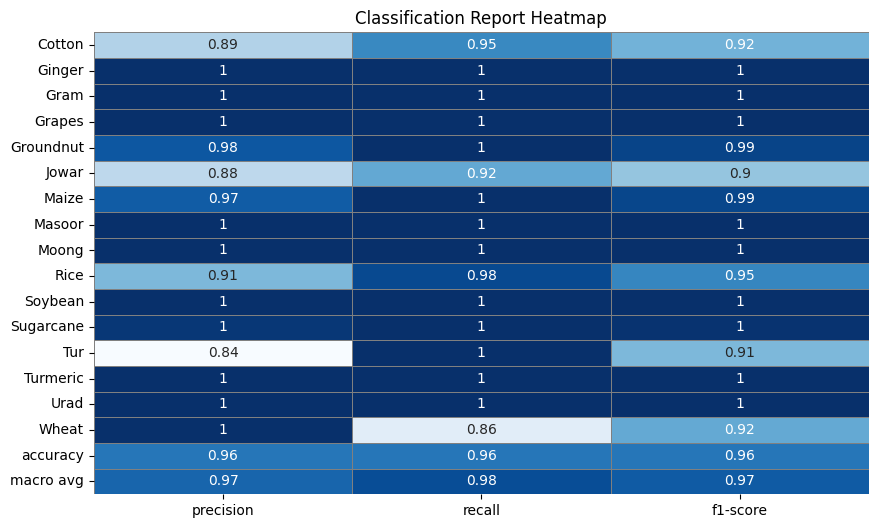

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import pandas as pd

# Generate classification report
report = classification_report(y_test_flat, predictions_flat, output_dict=True)
report_df = pd.DataFrame(report).transpose()

# Plotting heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap="Blues", cbar=False, linewidths=0.5, linecolor='gray')
plt.title("Classification Report Heatmap")
plt.show()

In [100]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [101]:
# random_forest_model = RandomForest(n_trees=7, max_depth=7, min_samples=5)
# # Make sure to fit the model with your training data
# random_forest_model.fit(X_train, y_train)

In [102]:
# import numpy as np
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.model_selection import cross_val_predict
# import warnings
# from sklearn.exceptions import DataConversionWarning
# import warnings

# # Suppress specific warnings
# warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.base")

# warnings.filterwarnings(action='ignore', category=DataConversionWarning)




In [103]:
# def recommendation(District_Name, Soil_color, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer, random_forest_model, sc, label_encoders):
#     # Encode the categorical features
#     District_Name_encoded = label_encoders['District_Name'].transform([District_Name])[0]
#     Soil_color_encoded = label_encoders['Soil_color'].transform([Soil_color])[0]
#     Fertilizer_encoded = label_encoders['Fertilizer'].transform([Fertilizer])[0]

#     # Arrange features into a numpy array
#     features = np.array([[District_Name_encoded, Soil_color_encoded, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer_encoded]])
#     X = sc.fit(features)
#     # Scale features using StandardScaler
#     X = sc.transform(features)

#     # Make predictions with your model
#     prediction = random_forest_model.predict(X)

#     # Return the prediction
#     return prediction


In [104]:

# District_Name = 'Solapur'
# Soil_color = 'Red'
# Nitrogen = 40  # Example value
# Phosphorus = 2  # Example value
# Potassium = 50  # Example value
# pH = 6.5  # Example value
# Rainfall = 600  # Example value
# Temperature = 40.0  # Example value
# Fertilizer = 'Urea'

# crop_recommendation = recommendation(District_Name, Soil_color, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer, random_forest, sc, label_encoders)

# # Display the recommended crop
# if crop_recommendation:
#     print("{} is the best crop to be cultivated.".format(crop_recommendation))
# else:
#     print("Sorry, we are not able to recommend a proper crop for this environment.")




In [105]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_score

# # Initialize the RandomForestClassifier
# RF = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10)

# # ---------------- Cross-validation ---------------- 
# scores = cross_val_score(RF, X_train, y_train, cv=20)
# print("Cross-Validation Scores:", scores)

# mean_score = scores.mean()
# std_dev = scores.std()
# print("Mean Score:", mean_score)
# print("Standard Deviation:", std_dev)
# print("Mean Accuracy:", scores.mean()*100)





## Finding best params for Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

# Define a function to calculate Gini and Entropy
# def calculate_criteria(y_probs):
#     gini = 1 - np.sum(y_probs ** 2, axis=1)
#     entropy = -np.sum(y_probs * np.log2(y_probs + 1e-10), axis=1)  # Adding a small value to avoid log(0)
#     return gini, entropy

def calculate_criteria(y_probs):
    # Check if y_probs is one-dimensional
    if y_probs.ndim == 1:
        # Reshape y_probs to two columns: [probability of negative class, probability of positive class]
        y_probs = np.vstack((1 - y_probs, y_probs)).T

    gini = 1 - np.sum(y_probs ** 2, axis=1)
    entropy = -np.sum(y_probs * np.log2(y_probs + 1e-10), axis=1)  # Adding a small value to avoid log(0)
    return gini, entropy

# Define the parameter grid to search
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the Random Forest model
random_forest = RandomForest()
grid_search_rf = GridSearchCV(random_forest, param_grid_rf, cv=5, scoring='accuracy')

# Fit the model
grid_search_rf.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search_rf.best_params_

# Use the best model to predict probabilities
y_probs = grid_search_rf.predict_proba(X_test)

# Calculate Gini and Entropy for the best model
gini, entropy = calculate_criteria(y_probs)

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
# print("Gini: {:.4f}".format(np.mean(gini)))
# print("Entropy: {:.4f}".format(np.mean(entropy)))


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


C:\Users\mehre\AppData\Local\Temp\ipykernel_25344\4035866687.py:19: RuntimeWarning: invalid value encountered in log2
  entropy = -np.sum(y_probs * np.log2(y_probs + 1e-10), axis=1)  # Adding a small value to avoid log(0)


In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from scipy.stats import sem


# Initialize the RandomForestClassifier using best params
random_forest = RandomForest(max_depth = 9, min_samples_leaf =4, min_samples_split = 2, n_estimators =100)


# ---------------- Cross-validation ---------------- 
scores = cross_val_score(random_forest, X_train, y_train, cv=20)
print("Cross-Validation Scores:", scores)

# Calculate mean and standard deviation
mean_score = scores.mean()
std_dev = scores.std()
standard_error = sem(scores)  # Calculate standard error of the mean
mean_error_rate = 1 - mean_score  # Calculate mean error rate

# Print results
print("Mean Score:", mean_score)
print("Standard Deviation:", std_dev)
print("Standard Error:", standard_error)
print("Mean Accuracy:", mean_score*100,"%")



Cross-Validation Scores: [0.88950276 0.93922652 0.92265193 0.9281768  0.9558011  0.95027624
 0.92265193 0.91160221 0.9558011  0.92265193 0.92222222 0.92222222
 0.94444444 0.93333333 0.93333333 0.93888889 0.91666667 0.91666667
 0.87222222 0.91666667]
Mean Score: 0.9257504604051567
Standard Deviation: 0.019890647762307898
Standard Error: 0.0045632275535507135
Mean Accuracy: 92.57504604051567 %


# Cross-Validation Results for Random Forest Classifier


In [107]:
from IPython.display import Markdown, display
# Display Heading
display(Markdown('**Cross-Validation Results for Decision Tree Classifier**'))

# Display Results
display(Markdown(f'**Cross-Validation Scores:** {scores}'))
display(Markdown(f'**Mean Score:** {scores.mean():.4f}'))
display(Markdown(f'**Standard Deviation:** {scores.std():.4f}'))
display(Markdown(f'**Mean Accuracy:** {scores.mean():.4f}'))


**Cross-Validation Results for Decision Tree Classifier**

**Cross-Validation Scores:** [0.88950276 0.93922652 0.92265193 0.9281768  0.9558011  0.95027624
 0.92265193 0.91160221 0.9558011  0.92265193 0.92222222 0.92222222
 0.94444444 0.93333333 0.93333333 0.93888889 0.91666667 0.91666667
 0.87222222 0.91666667]

**Mean Score:** 0.9258

**Standard Deviation:** 0.0199

**Mean Accuracy:** 0.9258

# Recommendation system



In [108]:
def recommendation(District_Name, Soil_color, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer, random_forest_model, sc, label_encoders):
    # Encode the categorical features
    District_Name_encoded = label_encoders['District_Name'].transform([District_Name])[0]
    Soil_color_encoded = label_encoders['Soil_color'].transform([Soil_color])[0]
    Fertilizer_encoded = label_encoders['Fertilizer'].transform([Fertilizer])[0]

    # Arrange features into a numpy array
    features = np.array([[District_Name_encoded, Soil_color_encoded, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer_encoded]])
    X = sc.fit(features)
    # Scale features using StandardScaler
    X = sc.transform(features)

    # Make predictions with your model
    prediction = rmodel.predict(X)

    # Return the prediction
    return prediction

In [109]:

District_Name = 'Solapur'
Soil_color = 'Red'
Nitrogen = 40 
Phosphorus = 2  
Potassium = 50  
pH = 6.5  
Rainfall = 600  
Temperature = 40.0  
Fertilizer = 'Urea'

crop_recommendation = recommendation(District_Name, Soil_color, Nitrogen, Phosphorus, Potassium, pH, Rainfall, Temperature, Fertilizer, random_forest, sc, label_encoders)

# Display the recommended crop
if crop_recommendation:
    print("{} is the best crop to be cultivated.".format(crop_recommendation))
else:
    print("Sorry, we are not able to recommend a proper crop for this environment.")

['Gram'] is the best crop to be cultivated.


In [110]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import cross_val_predict
# from sklearn.metrics import confusion_matrix
# import numpy as np

# Initialize the RandomForestClassifier (assuming you're using scikit-learn's implementation)
random_forest = RandomForest(
    max_depth=10, 
    min_samples_leaf=3, 
    min_samples_split=7, 
    n_estimators=100, 
    criterion='gini',  # Passed as a string
    bootstrap=True,
    n_trees=77
)


# Cross-validation predictions
y_pred = cross_val_predict(random_forest, X_train, y_train, cv=10)

# Compute the Confusion Matrix
cm = confusion_matrix(y_train, y_pred)

# Extract the metrics for the specific crop

crop_index = list(np.unique(y_train)).index(crop_recommendation)
true_positives = cm[crop_index][crop_index]
false_positives = sum(cm[:, crop_index]) - true_positives
false_negatives = sum(cm[crop_index, :]) - true_positives
true_negatives = sum(sum(cm)) - (true_positives + false_positives + false_negatives)

# Compute metrics
accuracy_crop = (true_positives + true_negatives) / sum(sum(cm))
precision_crop = true_positives / (true_positives + false_positives)
recall_crop = true_positives / (true_positives + false_negatives)
f1_crop = 2 * (precision_crop * recall_crop) / (precision_crop + recall_crop)

# Display the metrics for the recommended crop
print(f"Accuracy for {crop_recommendation}: {accuracy_crop:.2%}")
print(f"Precision for {crop_recommendation}: {precision_crop:.2%}")
print(f"Recall for {crop_recommendation}: {recall_crop:.2%}")
print(f"F1-Score for {crop_recommendation}: {f1_crop:.2%}")


Accuracy for ['Gram']: 99.94%
Precision for ['Gram']: 96.97%
Recall for ['Gram']: 100.00%
F1-Score for ['Gram']: 98.46%


# Interpretation:

Accuracy for ['Gram']: 99.94%

Accuracy represents the proportion of correctly predicted instances of the class 'Gram' out of all instances. In this case, the model correctly predicted 'Gram' with a high accuracy of 99.94%.
Precision for ['Gram']: 96.97%

Precision measures the accuracy of positive predictions for the class 'Gram.' It tells us how many of the predicted 'Gram' instances were actually 'Gram.' In this case, 96.97% of the predicted 'Gram' instances were correct.
Recall for ['Gram']: 100.00%

Recall, also known as sensitivity or true positive rate, measures the ability of the model to correctly identify all actual instances of the class 'Gram.' A recall of 100.00% means that the model captured all 'Gram' instances.
F1-Score for ['Gram']: 98.46%

The F1-score is the harmonic mean of precision and recall. It provides a balanced measure of a model's performance by considering both false positives and false negatives. An F1-score of 98.46% indicates good overall performance for the class 'Gram.

In [89]:
import pickle
pickle.dump(random_forest,open('model.pkl','wb'))



In [90]:
pickle.dump(sc,open('standscaler.pkl','wb'))